# Misclassification analysis

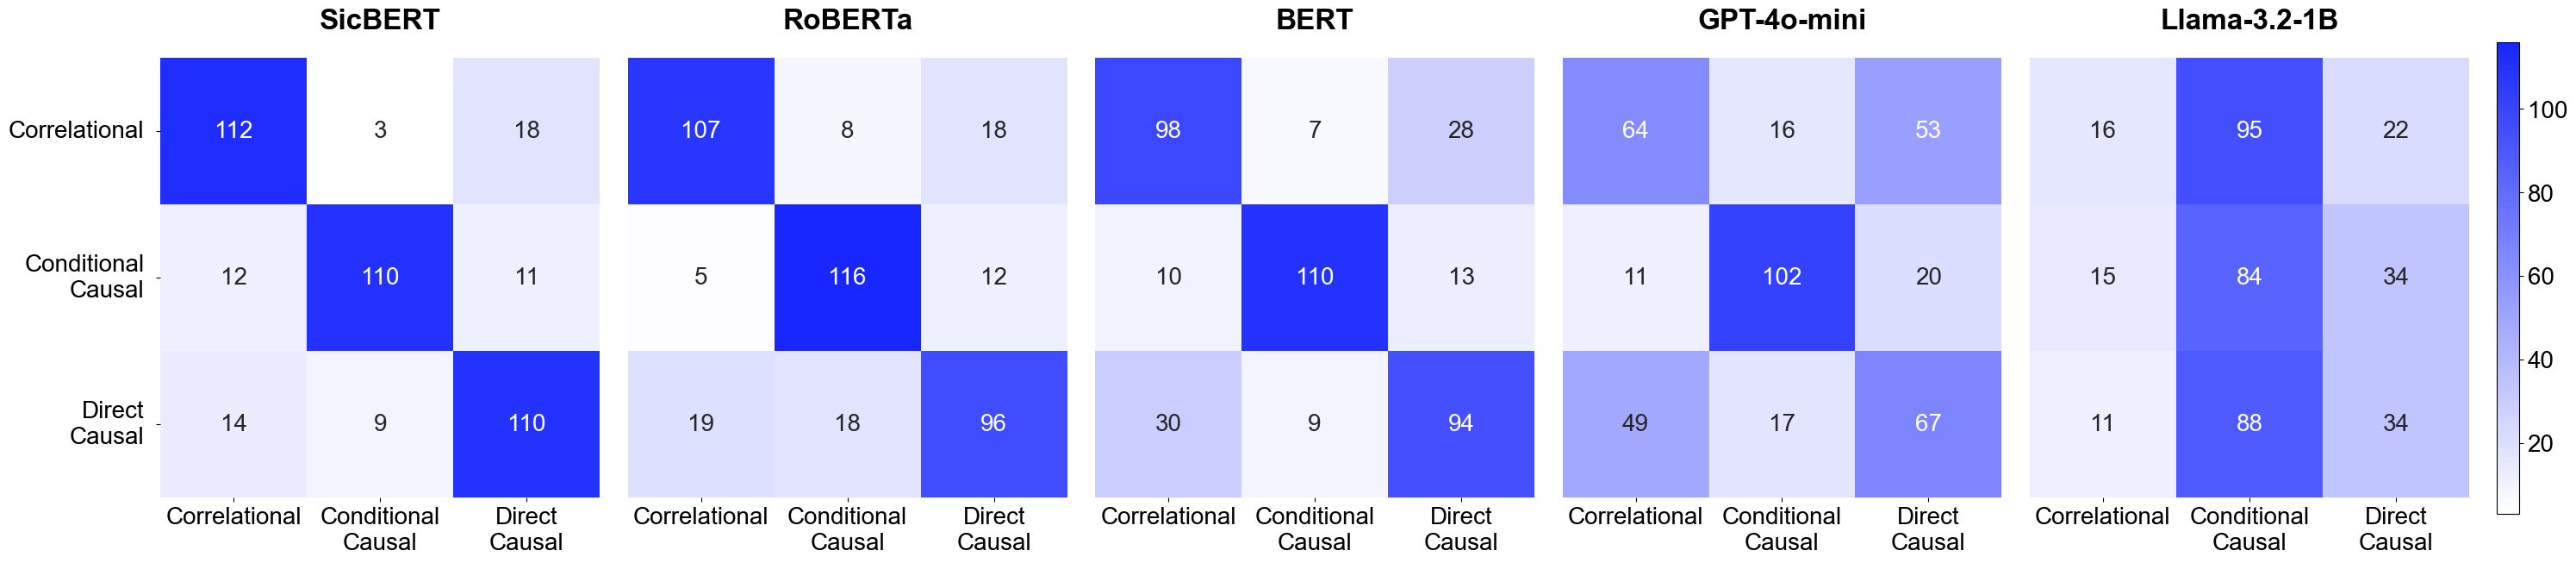

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

# Confusion matrices
conf_matrices = {
    "SicBERT": np.array([[112,  3, 18],
                         [ 12, 110, 11],
                         [ 14,  9, 110]]),
    "RoBERTa": np.array([[107,  8, 18],
                         [  5, 116, 12],
                         [ 19, 18, 96]]),
    "BERT":    np.array([[ 98,  7, 28],
                         [ 10, 110, 13],
                         [ 30,  9, 94]]),
    "GPT-4o-mini": np.array([[ 64, 16, 53],
                             [ 11,102, 20],
                             [ 49, 17, 67]]),
    "Llama-3.2-1B": np.array([[ 16, 95, 22],
                              [ 15, 84, 34],
                              [ 11, 88, 34]])
}

# Custom colormap: white to deep blue
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blue", ["white", "#1827FF"], N=100
)

# Create figure with adjusted layout
fig, axes = plt.subplots(1, 6, figsize=(30, 6), 
                        gridspec_kw={"width_ratios": [1, 1, 1, 1, 1, 0.05]})

tick_positions = [0.5, 1.5, 2.5]
tick_labels = ["Correlational", "Conditional\nCausal", "Direct\nCausal"]

# Find global min/max for consistent color scaling
global_min = min(m.min() for m in conf_matrices.values())
global_max = max(m.max() for m in conf_matrices.values())

# Plot all confusion matrices
for i, (model_name, matrix) in enumerate(conf_matrices.items()):
    ax = axes[i]
    sns.heatmap(
        matrix,
        ax=ax,
        cmap=custom_cmap,
        annot=True,
        fmt="d",
        cbar=False,
        square=True,
        annot_kws={"size": 20},  # Increased number size
        linewidths=0,
        linecolor="none",
        vmin=global_min,
        vmax=global_max
    )
    # Set title higher with increased font size
    ax.set_title(model_name, fontsize=24, fontweight='bold', y=1.05)
    
    # Y-axis labels for first plot only (manually centered)
    if i == 0:
        ax.set_yticks(tick_positions)  # Ensure ticks are properly positioned
        ax.set_yticklabels(tick_labels, fontsize=20)
        ax.yaxis.set_tick_params(pad=10, labelsize=20, rotation=0)  # Space them out for clarity
    else:
        ax.set_yticks([])
    
    # X-axis labels for all plots
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, fontsize=20, rotation=0)

# Create single color bar in last subplot
cbar_ax = axes[-1]
sm = plt.cm.ScalarMappable(cmap=custom_cmap, 
                         norm=plt.Normalize(vmin=global_min, vmax=global_max))
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

# Final layout adjustments
plt.subplots_adjust(wspace=0.3)  # Space between heatmaps
plt.tight_layout()

# Save figure
plt.savefig("confusion_matrices_wide.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()


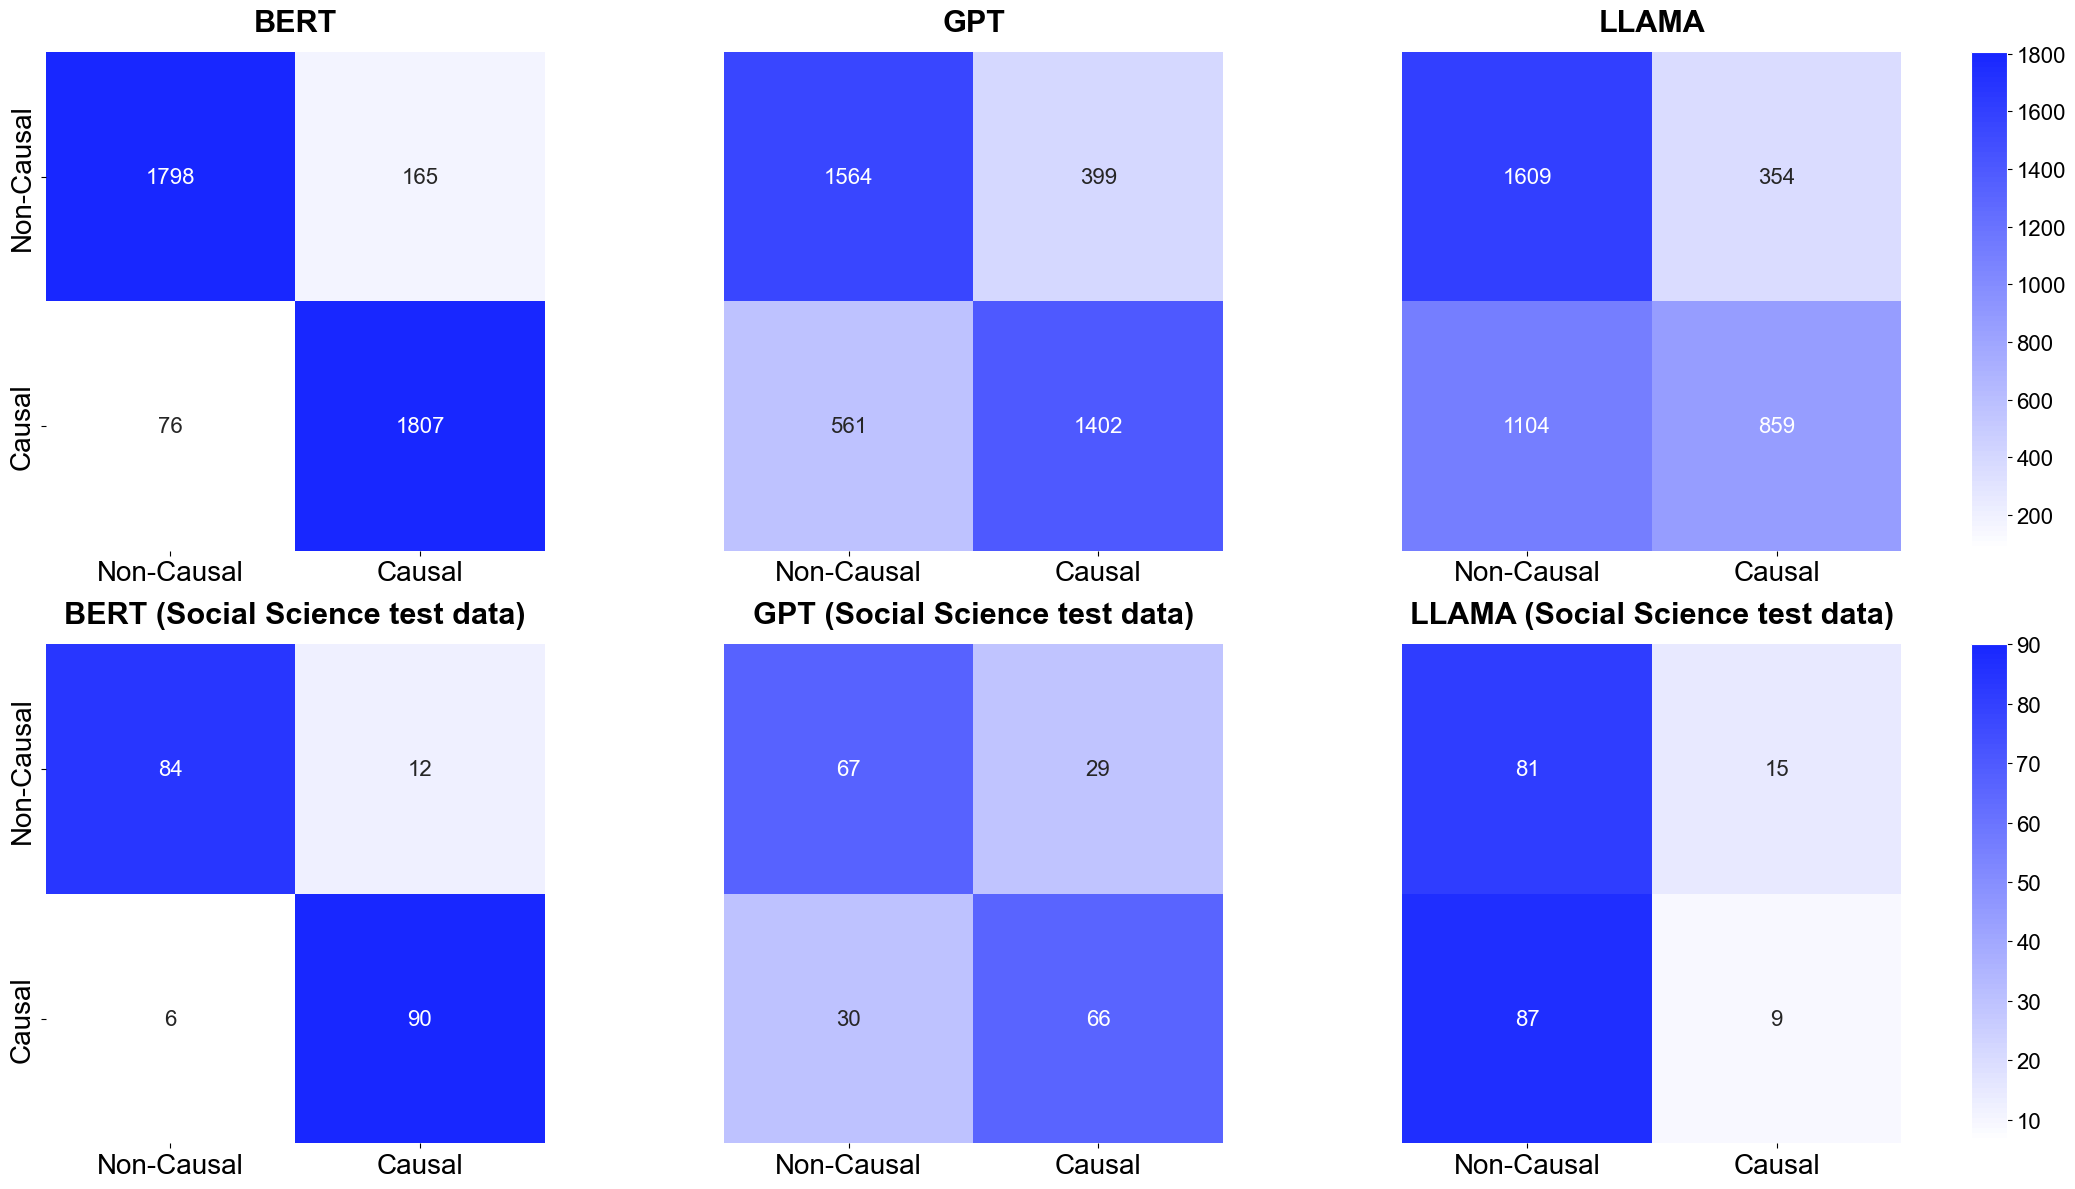

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

# Updated Confusion Matrices based on the provided image
conf_matrices = {
    "BERT": np.array([[1798, 165], [76, 1807]]),
    "GPT": np.array([[1564, 399], [561, 1402]]),
    "LLAMA": np.array([[1609, 354], [1104, 859]]),
    "BERT (Social Science test data)": np.array([[84, 12], [6, 90]]),
    "GPT (Social Science test data)": np.array([[67, 29], [30, 66]]),
    "LLAMA (Social Science test data)": np.array([[81, 15], [87, 9]]),
}

# Custom colormap: white to deep blue
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", ["white", "#1827FF"], N=100)

# Create 3x3 grid for confusion matrices + color bar per row
fig, axes = plt.subplots(2, 4, figsize=(24, 12), gridspec_kw={"width_ratios": [1, 1, 1, 0.05]})

# Labels for Confusion Matrix Axes
x_labels = ["Non-Causal", "Causal"]
y_labels = ["Non-Causal", "Causal"]

# Find min/max for each row separately for independent color scaling
row1_matrices = list(conf_matrices.values())[:3]  # Full Test Set
row2_matrices = list(conf_matrices.values())[3:]  # SSC Test Set

row1_min, row1_max = min(m.min() for m in row1_matrices), max(m.max() for m in row1_matrices)
row2_min, row2_max = min(m.min() for m in row2_matrices), max(m.max() for m in row2_matrices)

# Plot Confusion Matrices
for i, (model_name, matrix) in enumerate(conf_matrices.items()):
    row, col = divmod(i, 3)  # Convert index to grid position
    ax = axes[row, col]

    # Use independent color scales for each row
    vmin, vmax = (row1_min, row1_max) if row == 0 else (row2_min, row2_max)

    sns.heatmap(
        matrix,
        ax=ax,
        cmap=custom_cmap,
        annot=True,
        fmt="d",
        cbar=False,  # No individual color bars
        square=True,
        annot_kws={"size": 16},
        linewidths=0,  # No borders
        linecolor="none",
        vmin=vmin,
        vmax=vmax
    )

    # Set title
    ax.set_title(model_name, fontsize=22, fontweight="bold", pad=15, y=1.00)

    # Set x-axis labels
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(x_labels, fontsize=20)

    # Set y-axis labels only for first column
    if col == 0:
        ax.set_yticks([0.5, 1.5])
        ax.set_yticklabels(y_labels, fontsize=20, va="center")
    else:
        ax.set_yticks([])

# Create separate color bars for each row
for row in range(2):
    cbar_ax = axes[row, 3]  # Color bar in the last column
    vmin, vmax = (row1_min, row1_max) if row == 0 else (row2_min, row2_max)
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = plt.colorbar(sm, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=16)

# Adjust layout for proper spacing
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for color bar

# Save figure (optional)
plt.savefig("confusion_matrices_3x2.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


<Figure size 1200x600 with 0 Axes>

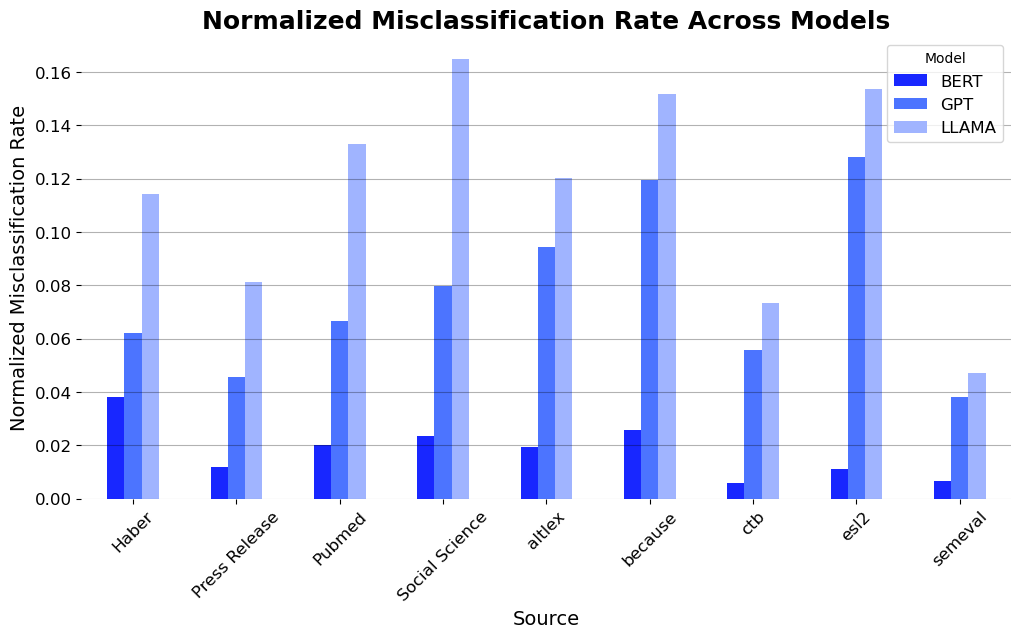

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Training and Validation Source Distribution
training_and_validation_source_counts = {
    "Haber": 2253, "Press Release": 1538, "Pubmed": 2023, "Social Science": 679,
    "altlex": 616, "because": 310, "ctb": 1184, "esl2": 1438, "semeval": 5657
}

# Load misclassified data
file_paths = {
    "BERT": "./final misclassifications/2_misclassified_sentences_BERT.csv",
    "GPT": "./final misclassifications/2_misclassified_sentences _GPT.csv",
    "LLAMA": "./final misclassifications/2_misclassified_sentences_llama.csv",
}

misclassified_data = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Standardize column names and fix source names
for model, df in misclassified_data.items():
    df.columns = df.columns.str.lower().str.strip()
    df.rename(columns={"predicted label": "predicted_label", "true label": "true_label"}, inplace=True)
    df['source'] = df['source'].replace({
        "Pubmed data.csv": "Pubmed",
        "Press_Release": "Press Release",
        "social_science": "Social Science",
        "Ssc": "Social Science"
    })
    
    if df["true_label"].dtype == "object":
        df["true_label"] = df["true_label"].map({"causal": 1, "non-causal": 0})
    if df["predicted_label"].dtype == "object":
        df["predicted_label"] = df["predicted_label"].map({"causal": 1, "non-causal": 0})

# Normalize misclassification rates
def normalize_misclassifications(misclassified_data, train_counts):
    source_errors = {model: df['source'].value_counts() for model, df in misclassified_data.items()}
    misclass_df = pd.DataFrame(source_errors).fillna(0)
    misclass_df.index.name = "source"
    misclass_df = misclass_df.reset_index()
    
    # Build a mapping of source to total instances.
    source_totals = {source: train_counts.get(source, 0)
                     for source in misclass_df["source"]}
    
    # For each model, compute the normalized misclassification rate.
    for model in source_errors.keys():
        misclass_df[model + "_normalized"] = misclass_df[model] / misclass_df["source"].map(source_totals)
    
    return misclass_df

# Generate normalized misclassification rates
normalized_misclassifications = normalize_misclassifications(misclassified_data, training_and_validation_source_counts).reset_index(drop=True)

# Define color palettes
misclassification_colors = ["#1827FF", "#4C74FF", "#A0B4FF"]

# Function to plot Normalized Misclassification Rates with a custom legend
def plot_normalized_misclassifications(misclass_df, title):
    # Identify columns that contain normalized rates.
    norm_cols = [col for col in misclass_df.columns if "_normalized" in col]
    # Create a list of model names by removing the trailing "_normalized"
    model_names = [col.replace("_normalized", "") for col in norm_cols]
    
    plt.figure(figsize=(12, 6))
    ax = misclass_df.plot(kind='bar', x='source', y=norm_cols, figsize=(12, 6),
                           color=misclassification_colors, edgecolor=None)
    
    plt.title(title, fontsize=18, fontweight="bold")
    plt.ylabel("Normalized Misclassification Rate", fontsize=14)
    plt.xlabel("Source", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Set the legend to just the model names.
    plt.legend(model_names, title="Model", fontsize=12)
    
    plt.grid(axis="y", linestyle="-", alpha=0.3, color="black")
    sns.despine(left=True, bottom=True)
    plt.savefig("Normalized Misclassifications 2 level.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Generate the improved plot
plot_normalized_misclassifications(normalized_misclassifications, "Normalized Misclassification Rate Across Models")


In [38]:
misclassified_data_llama = pd.read_csv("./final misclassifications/3_misclassified_sentences_LLama.csv",delimiter=',')
misclassified_data_llama

,sentence,true_label,predicted_label,source
0,These were participants with little or no expe...,1.0,0.0,ssc
1,A number of studies have argued that survey-ba...,1.0,0.0,ssc
2,When the objective incentives remain identical...,2.0,1.0,ssc
3,It is now well established that imagined conta...,1.0,0.0,ssc
4,Because we conjectured that the opportunity fo...,1.0,2.0,ssc
...,...,...,...,...
402,The intragastric pressure rise inducing this ...,2.0,1.0,pubmed
403,Early subjective clinical judgment of physicia...,2.0,1.0,pubmed
404,Proper patient selection is an important varia...,2.0,1.0,pubmed
405,Study finds coordinated approach improves qual...,2.0,1.0,press_release


<Figure size 1200x600 with 0 Axes>

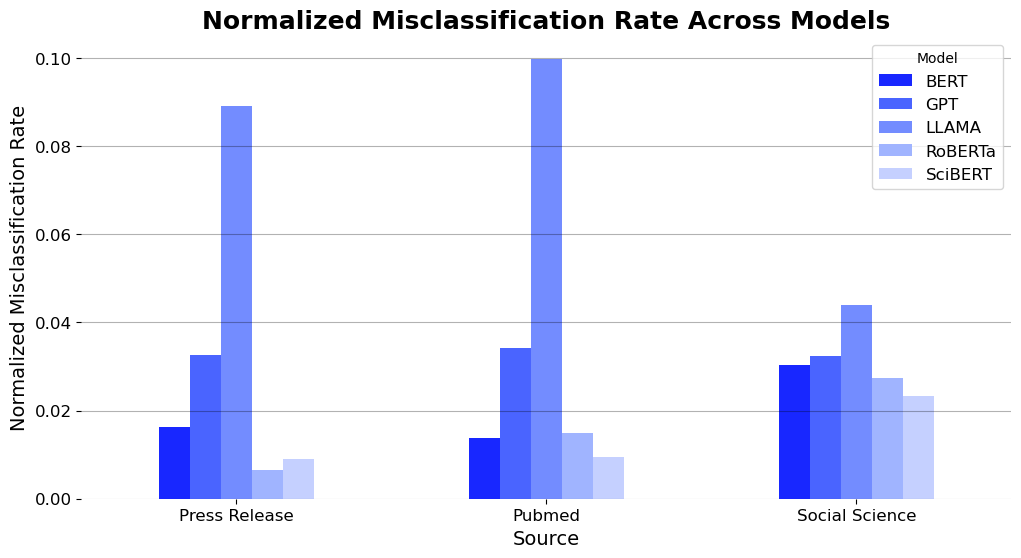

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for misclassified data
file_paths = {
    "BERT": "./final misclassifications/3_misclassified_sentences_BERT.csv",
    "GPT": "./final misclassifications/3_misclassified_sentences_GPT.csv",
    "LLAMA": "./final misclassifications/3_misclassified_sentences_LLama.csv",
    "RoBERTa": "./final misclassifications/3_misclassified_sentences_roberta.csv",
    "SciBERT": "./final misclassifications/3_misclassified_sentences_scibert.csv",
}

# Updated Training and Validation Source Distribution
training_source_counts = {
    "Press Release": 1322, "Pubmed": 1787, "Social Science": 1262
}

validation_source_counts = {
    "Press Release": 216, "Pubmed": 236, "Social Science": 193
}

# Compute total data counts for normalization
total_data_counts = {
    source: training_source_counts.get(source, 0) + validation_source_counts.get(source, 0)
    for source in training_source_counts.keys()
}

# Check which files are actually available
available_files = {model: path for model, path in file_paths.items() if os.path.exists(path)}

# Load and clean only available misclassified data
misclassified_data = {}
for model, path in available_files.items():
    try:
        df = pd.read_csv(path, delimiter=',')

        # Standardize column names
        df.columns = df.columns.str.lower().str.strip()
        df.rename(columns={"predicted label": "predicted_label", "true label": "true_label"}, inplace=True)

        # Handle missing values before converting to integers
        df["true_label"] = pd.to_numeric(df["true_label"], errors='coerce')
        df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors='coerce')

        # Drop rows where labels are NaN (invalid values)
        df.dropna(subset=["true_label", "predicted_label"], inplace=True)

        # Convert labels to integers
        df["true_label"] = df["true_label"].astype(int)
        df["predicted_label"] = df["predicted_label"].astype(int)

        # Store cleaned data
        misclassified_data[model] = df

    except Exception as e:
        print(f"Error loading {model}: {e}")

# Normalize the misclassification counts by source.
def normalize_source(source):
    s = str(source).strip().lower()
    if s in ["press_release", "press release"]:
        return "Press Release"
    elif s in ["pubmed"]:
        return "Pubmed"
    elif s in ["ssc", "social_science", "social science"]:
        return "Social Science"
    else:
        return s

# Normalize the "source" column in each misclassified DataFrame.
for model, df in misclassified_data.items():
    if "source" in df.columns:
        df["source"] = df["source"].apply(normalize_source)

# Count misclassifications by source per model and compute normalized rates.
def normalize_misclassifications(misclassified_data, total_data_counts):
    source_errors = {model: df['source'].value_counts() for model, df in misclassified_data.items()}
    misclass_df = pd.DataFrame(source_errors).fillna(0)
    misclass_df.index.name = "Source"
    misclass_df = misclass_df.reset_index()

    # Compute normalized misclassification rate
    for model in source_errors.keys():
        misclass_df[model + " Misclassification Rate"] = misclass_df["Source"].map(total_data_counts).fillna(1)
        misclass_df[model + " Misclassification Rate"] = misclass_df[model] / misclass_df[model + " Misclassification Rate"]
    
    return misclass_df

normalized_misclassifications = normalize_misclassifications(misclassified_data, total_data_counts)

# Define color palettes
misclassification_colors = ["#1827FF", "#4A64FF", "#738CFF", "#A0B4FF", "#C5D0FF"]

# Plotting function with legend showing only model names.
def plot_normalized_misclassifications(misclass_df, title):
    norm_cols = [col for col in misclass_df.columns if "Misclassification Rate" in col]
    model_names = [col.replace(" Misclassification Rate", "") for col in norm_cols]
    
    plt.figure(figsize=(12, 6))
    misclass_df.plot(kind='bar', x='Source', y=norm_cols, figsize=(12, 6),
                     color=misclassification_colors, edgecolor=None)
    plt.title(title, fontsize=18, fontweight="bold")
    plt.ylabel("Normalized Misclassification Rate", fontsize=14)
    plt.xlabel("Source", fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(model_names, title="Model", fontsize=12)
    plt.grid(axis="y", linestyle="-", alpha=0.3, color="black")
    sns.despine(left=True, bottom=True)
    plt.savefig("Normalized Misclassifications 3 level.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Generate the plot
plot_normalized_misclassifications(normalized_misclassifications, "Normalized Misclassification Rate Across Models")


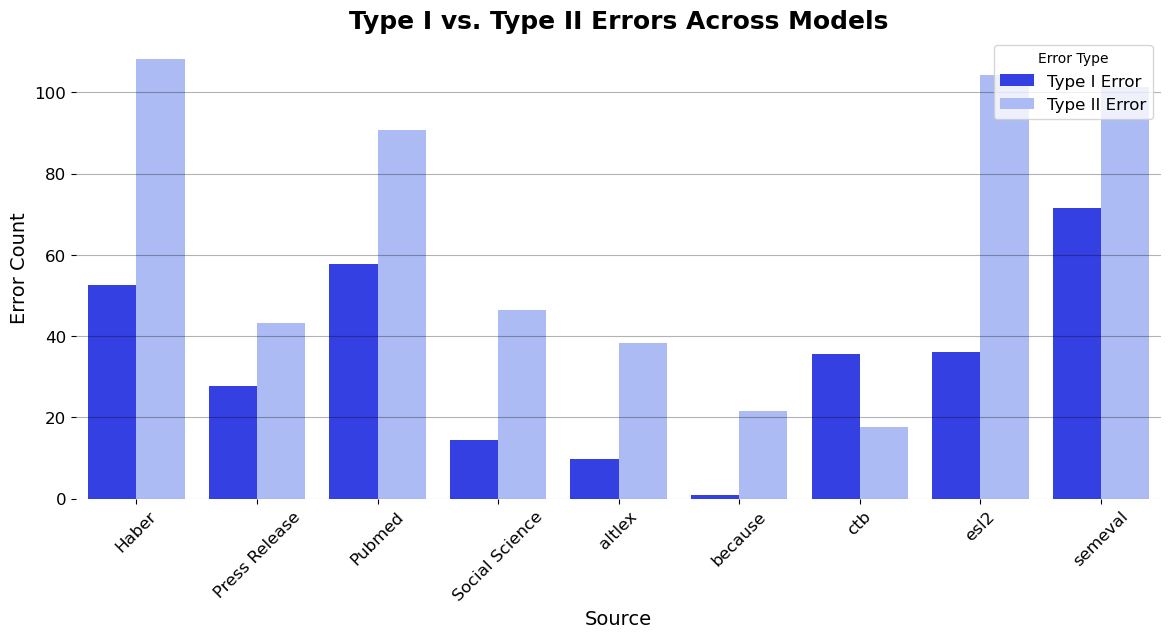

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Training and Validation Source Distribution
training_and_validation_source_counts = {
    "Haber": 2253, "Press Release": 1538, "Pubmed": 2023, "Social Science": 679,
    "altlex": 616, "because": 310, "ctb": 1184, "esl2": 1438, "semeval": 5657
}

# Load misclassified data
file_paths = {
    "BERT": "./final misclassifications/2_misclassified_sentences_BERT.csv",
    "GPT": "./final misclassifications/2_misclassified_sentences _GPT.csv",
    "LLAMA": "./final misclassifications/2_misclassified_sentences_llama.csv",
}


misclassified_data = {model: pd.read_csv(path) for model, path in file_paths.items()}

# Standardize column names and fix source names
for model, df in misclassified_data.items():
    df.columns = df.columns.str.lower().str.strip()
    df.rename(columns={"predicted label": "predicted_label", "true label": "true_label"}, inplace=True)
    df['source'] = df['source'].replace({
        "Pubmed data.csv": "Pubmed",
        "Press_Release": "Press Release",
        "social_science": "Social Science",
        "Ssc": "Social Science"
    })
    
    if df["true_label"].dtype == "object":
        df["true_label"] = df["true_label"].map({"causal": 1, "non-causal": 0})
    if df["predicted_label"].dtype == "object":
        df["predicted_label"] = df["predicted_label"].map({"causal": 1, "non-causal": 0})

# Function to compute Type I and Type II errors
def compute_error_types(misclassified_data):
    error_counts = []
    for model, df in misclassified_data.items():
        type_i_errors = df[(df['true_label'] == 0) & (df['predicted_label'] == 1)].groupby('source').size()
        type_ii_errors = df[(df['true_label'] == 1) & (df['predicted_label'] == 0)].groupby('source').size()
        
        error_df = pd.DataFrame({
            'Source': type_i_errors.index,
            'Type I Error': type_i_errors.values,
            'Type II Error': type_ii_errors.reindex(type_i_errors.index, fill_value=0).values,
            'Model': model
        })
        error_counts.append(error_df)
    
    return pd.concat(error_counts, ignore_index=True)

error_types = compute_error_types(misclassified_data)

# Define consistent color palette
error_colors = ["#1827FF", "#A0B4FF"]  

# Function to plot Type I vs. Type II Errors
def plot_error_types(error_df, title):
    plt.figure(figsize=(14, 6))
    
    sns.barplot(
        data=error_df.melt(id_vars=['Source', 'Model'], value_vars=['Type I Error', 'Type II Error'],
                            var_name="Error Type", value_name="Count"),
        x="Source", 
        y="Count", 
        hue="Error Type", 
        palette=error_colors, 
        dodge=True, 
        edgecolor=None,  # Remove black stripes
        errorbar=None
    )
    
    plt.title(title, fontsize=18, fontweight="bold")
    plt.xlabel("Source", fontsize=14)
    plt.ylabel("Error Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle="-", alpha=0.3, color="black")  
    sns.despine(left=True, bottom=True)
    plt.legend(title="Error Type", fontsize=12, loc="upper right")
    plt.savefig("type I type II 2 level.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Generate the improved Type I vs. Type II Error Plot
plot_error_types(error_types, "Type I vs. Type II Errors Across Models")


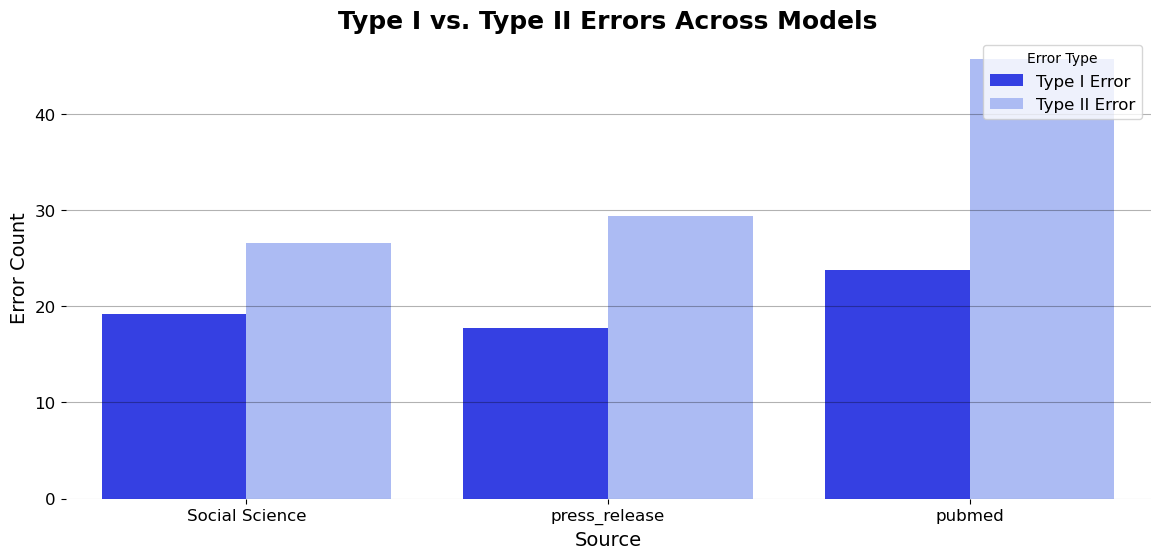

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Training and Validation Source Distribution
training_source_counts = {
    "Press Release": 1322, "Pubmed": 1787, "Social Science": 1262
}

validation_source_counts = {
    "Press Release": 216, "Pubmed": 236, "Social Science": 193
}

# Compute total data counts for normalization
total_data_counts = {
    source: training_source_counts.get(source, 0) + validation_source_counts.get(source, 0)
    for source in training_source_counts.keys()
}

# Load misclassified data (assuming available files)
file_paths = {
    "BERT": "./final misclassifications/3_misclassified_sentences_BERT.csv",
    "GPT": "./final misclassifications/3_misclassified_sentences_GPT.csv",
    "LLAMA": "./final misclassifications/3_misclassified_sentences_LLama.csv",
    "RoBERTa": "./final misclassifications/3_misclassified_sentences_roberta.csv",
    "SciBERT": "./final misclassifications/3_misclassified_sentences_scibert.csv",
}

# Check which files exist
available_files = {model: path for model, path in file_paths.items() if os.path.exists(path)}

# Load and clean only available misclassified data
misclassified_data = {}
for model, path in available_files.items():
    try:
        df = pd.read_csv(path)

        # Standardize column names
        df.columns = df.columns.str.lower().str.strip()
        df.rename(columns={"predicted label": "predicted_label", "true label": "true_label"}, inplace=True)

        # Standardize source names
        df['source'] = df['source'].replace({
            "Pubmed data.csv": "Pubmed",
            "Press_Release": "Press Release",
            "social_science": "Social Science",
            "Ssc": "Social Science",  
            "ssc": "Social Science"   
        })

        # Convert labels to numerical values if necessary
        if df["true_label"].dtype == "object":
            df["true_label"] = df["true_label"].map({"correlational": 0, "conditional causal": 1, "direct causal": 2})
        if df["predicted_label"].dtype == "object":
            df["predicted_label"] = df["predicted_label"].map({"correlational": 0, "conditional causal": 1, "direct causal": 2})

        misclassified_data[model] = df

    except Exception as e:
        print(f"Error loading {model}: {e}")

# Compute Type I and Type II errors
def compute_error_types(misclassified_data):
    error_counts = []
    for model, df in misclassified_data.items():
        type_i_errors = df[(df['true_label'] < df['predicted_label'])].groupby('source').size()
        type_ii_errors = df[(df['true_label'] > df['predicted_label'])].groupby('source').size()

        error_df = pd.DataFrame({
            'Source': type_i_errors.index,
            'Type I Error': type_i_errors.values,
            'Type II Error': type_ii_errors.reindex(type_i_errors.index, fill_value=0).values,
            'Model': model
        })
        error_counts.append(error_df)

    return pd.concat(error_counts, ignore_index=True)

# Generate error data
error_types = compute_error_types(misclassified_data)

# Define consistent color palette
error_colors = ["#1827FF", "#A0B4FF"]  # Type I (Dark Blue) & Type II (Light Blue)

# Plot Type I vs. Type II Errors
plt.figure(figsize=(14, 6))
sns.barplot(
    data=error_types.melt(id_vars=['Source', 'Model'], value_vars=['Type I Error', 'Type II Error'],
                           var_name="Error Type", value_name="Count"),
    x="Source",
    y="Count",
    hue="Error Type",
    palette=error_colors,
    dodge=True,
    edgecolor=None,
    errorbar=None
)

plt.title("Type I vs. Type II Errors Across Models", fontsize=18, fontweight="bold")
plt.xlabel("Source", fontsize=14)
plt.ylabel("Error Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="-", alpha=0.3, color="black")
sns.despine(left=True, bottom=True)
plt.legend(title="Error Type", fontsize=12, loc="upper right")
plt.savefig("type I type II 3 level.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()



In [330]:
import pandas as pd
import re
from collections import Counter, defaultdict

# ---------------------------
# Data Loading & Preprocessing
# ---------------------------

# Load misclassified data file paths.
file_paths = {
    "BERT": "./final misclassifications/2_misclassified_sentences_BERT.csv",
    "GPT": "./final misclassifications/2_misclassified_sentences_GPT.csv",
    "LLAMA": "./final misclassifications/2_misclassified_sentences_llama.csv",
}

# Load each CSV, standardize column names, and keep necessary columns including "source".
misclassified_data = []
for model, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        df.columns = df.columns.str.lower().str.strip()  # Standardize column names
        
        # Rename columns to be consistent.
        if "sentence" in df.columns:
            df.rename(columns={"sentence": "text"}, inplace=True)
        df.rename(columns={"true label": "true_label", "predicted label": "predicted_label"}, inplace=True)
        
        # Fix source names if needed.
        df['source'] = df['source'].replace({
            "Pubmed data.csv": "Pubmed",
            "Press_Release": "Press Release",
            "social_science": "Social Science",
            "Ssc": "Social Science"
        })
        
        # Convert label strings if necessary.
        if df["true_label"].dtype == "object":
            df["true_label"] = df["true_label"].map({"causal": 1, "non-causal": 0})
        if df["predicted_label"].dtype == "object":
            df["predicted_label"] = df["predicted_label"].map({"causal": 1, "non-causal": 0})
        
        # Keep the necessary columns: text, true_label, predicted_label, source.
        misclassified_data.append(df[["text", "true_label", "predicted_label", "source"]])
    except Exception as e:
        print(f"Error loading {model}: {e}")

# Combine all misclassified data into one DataFrame.
df_misclassified = pd.concat(misclassified_data, ignore_index=True)

# ---------------------------
# (Optional) Robust Label Conversion
# ---------------------------
def convert_label(label):
    try:
        return int(label)
    except (ValueError, TypeError):
        pass
    label_str = str(label).strip().lower()
    if label_str in ["causal", "1"]:
        return 1
    elif label_str in ["non-causal", "0"]:
        return 0
    else:
        return None

df_misclassified["true_label"] = df_misclassified["true_label"].apply(convert_label)
df_misclassified["predicted_label"] = df_misclassified["predicted_label"].apply(convert_label)

# ---------------------------
# Tokenization
# ---------------------------
manual_stopwords = {
    "a", "an", "et", "al", "the", "and", "or", "social", "trial", "condition", "did",
    "these", "goods", "avoid", "we", "behavior", "individual", "each", "maximize",
    "others", "public", "group", "pd", "self", "risk", "year", "day", "betty", "people", "patients",
    "lohan", "indonesia", "6", "arcade", "joseph", "gulf", "sheriff", "earthquake", "bombs", "three", "suspicion",
    "province", "storm", "firm", "checked", "athens", "operator", "lindsay", "district", "bank", "cable", "parliament",
    "police", "pitched", "seacom", "2011", "subsea", "twitter", "announced", "attack", "battles", "october", "fought", "they", "who", "one",
    "been", "be", "furious", "routes", "striking", "cuts", "outage", "he"
}

def custom_tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', str(text))
            if word.lower() not in manual_stopwords]

df_misclassified["filtered_tokens"] = df_misclassified["text"].apply(custom_tokenize)

# ---------------------------
# Bigram and Trigram Extraction with Source Breakdown
# ---------------------------
# For each label, we build dictionaries mapping an n‑gram (string) to a Counter of sources.
bigram_source_counts = {0: defaultdict(Counter), 1: defaultdict(Counter)}
trigram_source_counts = {0: defaultdict(Counter), 1: defaultdict(Counter)}

# Iterate over each row to extract bigrams and trigrams.
for idx, row in df_misclassified.iterrows():
    label = row["true_label"]
    if label is None:
        continue
    tokens = row["filtered_tokens"]
    source = row["source"]
    
    # Bigrams
    for bigram in zip(tokens, tokens[1:]):
        bg_str = " ".join(bigram)
        bigram_source_counts[label][bg_str][source] += 1
        
    # Trigrams
    for trigram in zip(tokens, tokens[1:], tokens[2:]):
        tg_str = " ".join(trigram)
        trigram_source_counts[label][tg_str][source] += 1

# Aggregate overall counts (summing across sources)
overall_bigram_counter = {0: Counter(), 1: Counter()}
overall_trigram_counter = {0: Counter(), 1: Counter()}

for label in [0, 1]:
    for ngram, src_counter in bigram_source_counts[label].items():
        overall_bigram_counter[label][ngram] = sum(src_counter.values())
    for ngram, src_counter in trigram_source_counts[label].items():
        overall_trigram_counter[label][ngram] = sum(src_counter.values())

# ---------------------------
# Create Summary DataFrame with Highest Source and its Count
# ---------------------------
# We'll produce one summary table that contains rows for both bigrams and trigrams.
# For each row, we'll show: True Label, Ngram Type, Ngram, Overall Count,
# Top Source, and Top Source Count.

label_map = {0: "non-causal", 1: "Causal"}
summary_rows = []

# For Bigram: take top 5 per label.
for label in [0, 1]:
    top_bigrams = overall_bigram_counter[label].most_common(5)
    for ngram, count in top_bigrams:
        # Get the source with the highest count for this bigram and that count.
        src_counter = bigram_source_counts[label][ngram]
        top_source, top_source_count = max(src_counter.items(), key=lambda x: x[1])
        summary_rows.append([label_map[label], "Bigram", ngram, count, top_source, top_source_count])
        
# For Trigram: take top 3 per label.
for label in [0, 1]:
    top_trigrams = overall_trigram_counter[label].most_common(3)
    for ngram, count in top_trigrams:
        src_counter = trigram_source_counts[label][ngram]
        top_source, top_source_count = max(src_counter.items(), key=lambda x: x[1])
        summary_rows.append([label_map[label], "Trigram", ngram, count, top_source, top_source_count])

summary_df = pd.DataFrame(summary_rows, columns=["True Label", "Ngram Type", "Ngram", "Overall Count", "Top Source", "Top Source Count"])

# Adjust pandas display options.
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

summary_df


,True Label,Ngram Type,Ngram,Overall Count,Top Source,Top Source Count
0,non-causal,Bigram,associated with,119,Haber,112
1,non-causal,Bigram,according to,46,esl2,32
2,non-causal,Bigram,at least,43,esl2,39
3,non-causal,Bigram,was associated,38,Haber,38
4,non-causal,Bigram,out of,37,esl2,26
5,Causal,Bigram,associated with,170,Haber,121
6,Causal,Bigram,caused by,95,semeval,75
7,Causal,Bigram,was associated,55,Haber,45
8,Causal,Bigram,at least,55,esl2,48
9,Causal,Bigram,due to,55,esl2,33


In [333]:

import pandas as pd
import re
from collections import Counter, defaultdict

# ---------------------------
# Data Loading & Preprocessing for BERT only
# ---------------------------

# Define file path for the BERT misclassified data.
bert_file = "./final misclassifications/2_misclassified_sentences_BERT.csv"

# Load the BERT data.
df = pd.read_csv(bert_file)
df.columns = df.columns.str.lower().str.strip()  # Standardize column names

# If the "sentence" column exists, rename it to "text".
if "sentence" in df.columns:
    df.rename(columns={"sentence": "text"}, inplace=True)
    
# Rename columns for consistency.
df.rename(columns={"true label": "true_label", "predicted label": "predicted_label"}, inplace=True)

# Fix source names if needed.
df['source'] = df['source'].replace({
    "Pubmed data.csv": "Pubmed",
    "Press_Release": "Press Release",
    "social_science": "Social Science",
    "Ssc": "Social Science"
})

# Convert label strings if necessary.
if df["true_label"].dtype == "object":
    df["true_label"] = df["true_label"].map({"causal": 1, "non-causal": 0})
if df["predicted_label"].dtype == "object":
    df["predicted_label"] = df["predicted_label"].map({"causal": 1, "non-causal": 0})

# Keep only the necessary columns.
df_bert = df[["text", "true_label", "predicted_label", "source"]].copy()

# ---------------------------
# (Optional) Robust Label Conversion
# ---------------------------
def convert_label(label):
    try:
        return int(label)
    except (ValueError, TypeError):
        pass
    label_str = str(label).strip().lower()
    if label_str in ["causal", "1"]:
        return 1
    elif label_str in ["non-causal", "0"]:
        return 0
    else:
        return None

df_bert["true_label"] = df_bert["true_label"].apply(convert_label)
df_bert["predicted_label"] = df_bert["predicted_label"].apply(convert_label)

# ---------------------------
# Tokenization
# ---------------------------
manual_stopwords = {
    "a", "an", "et", "al", "the", "and", "or", "social", "trial", "condition", "did",
    "these", "goods", "avoid", "we", "behavior", "individual", "each", "maximize",
    "others", "public", "group", "pd", "self", "risk", "year", "day", "betty", "people", "patients",
    "lohan", "indonesia", "6", "arcade", "joseph", "gulf", "sheriff", "earthquake", "bombs", "three", "suspicion",
    "province", "storm", "firm", "checked", "athens", "operator", "lindsay", "district", "bank", "cable", "parliament",
    "police", "pitched", "seacom", "2011", "subsea", "twitter", "announced", "attack", "battles", "october", "fought", "they", "who", "one",
    "been", "be", "furious", "routes", "striking", "cuts", "outage", "he", "maker", "calories", "purchased"
}

def custom_tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', str(text))
            if word.lower() not in manual_stopwords]

df_bert["filtered_tokens"] = df_bert["text"].apply(custom_tokenize)

# ---------------------------
# Bigram and Trigram Extraction with Source Breakdown (BERT only)
# ---------------------------
# For each label (0 = non-causal, 1 = causal), build dictionaries mapping an n‑gram (string) to a Counter of sources.
bigram_source_counts = {0: defaultdict(Counter), 1: defaultdict(Counter)}
trigram_source_counts = {0: defaultdict(Counter), 1: defaultdict(Counter)}

# Iterate over each row to extract bigrams and trigrams.
for idx, row in df_bert.iterrows():
    label = row["true_label"]
    if label is None:
        continue
    tokens = row["filtered_tokens"]
    source = row["source"]
    
    # Bigrams
    for bigram in zip(tokens, tokens[1:]):
        bg_str = " ".join(bigram)
        bigram_source_counts[label][bg_str][source] += 1
        
    # Trigrams
    for trigram in zip(tokens, tokens[1:], tokens[2:]):
        tg_str = " ".join(trigram)
        trigram_source_counts[label][tg_str][source] += 1

# Aggregate overall counts (summing across sources)
overall_bigram_counter = {0: Counter(), 1: Counter()}
overall_trigram_counter = {0: Counter(), 1: Counter()}

for label in [0, 1]:
    for ngram, src_counter in bigram_source_counts[label].items():
        overall_bigram_counter[label][ngram] = sum(src_counter.values())
    for ngram, src_counter in trigram_source_counts[label].items():
        overall_trigram_counter[label][ngram] = sum(src_counter.values())

# ---------------------------
# Create Summary DataFrame with Highest Source and its Count (BERT only)
# ---------------------------
# We'll produce one summary table that contains rows for both bigrams and trigrams.
# For each row, show: True Label, Ngram Type, Ngram, Overall Count, Top Source, and Top Source Count.

label_map = {0: "non-causal", 1: "Causal"}
summary_rows = []

# For Bigram: take top 5 per label.
for label in [0, 1]:
    top_bigrams = overall_bigram_counter[label].most_common(5)
    for ngram, count in top_bigrams:
        src_counter = bigram_source_counts[label][ngram]
        top_source, top_source_count = max(src_counter.items(), key=lambda x: x[1])
        summary_rows.append([label_map[label], "Bigram", ngram, count, top_source, top_source_count])
        
# For Trigram: take top 3 per label.
for label in [0, 1]:
    top_trigrams = overall_trigram_counter[label].most_common(3)
    for ngram, count in top_trigrams:
        src_counter = trigram_source_counts[label][ngram]
        top_source, top_source_count = max(src_counter.items(), key=lambda x: x[1])
        summary_rows.append([label_map[label], "Trigram", ngram, count, top_source, top_source_count])

summary_df = pd.DataFrame(summary_rows, columns=["True Label", "Ngram Type", "Ngram", "Overall Count", "Top Source", "Top Source Count"])

# Adjust pandas display options.
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
summary_df

,True Label,Ngram Type,Ngram,Overall Count,Top Source,Top Source Count
0,non-causal,Bigram,associated with,41,Haber,40
1,non-causal,Bigram,was associated,15,Haber,15
2,non-causal,Bigram,is associated,10,Haber,10
3,non-causal,Bigram,increased of,9,Haber,9
4,non-causal,Bigram,use of,8,Haber,5
5,Causal,Bigram,associated with,7,Haber,7
6,Causal,Bigram,results in,2,Pubmed,1
7,Causal,Bigram,used for,2,altlex,2
8,Causal,Bigram,made by,2,semeval,2
9,Causal,Bigram,small decrease,2,Haber,2


In [292]:
import pandas as pd
import re
from collections import Counter

# Define file paths for misclassified data
file_paths = {
    "BERT": "./final misclassifications/3_misclassified_sentences_ssc_BERT.csv",
    "GPT": "./final misclassifications/3_misclassified_sentences_GPT_ssc.csv",
    "LLAMA": "./final misclassifications/3_misclassified_sentences_ssc_Llama.csv",
    "RoBERTa": "./final misclassifications/3_misclassified_sentences_ssc_roberta.csv",
    "SciBERT": "./final misclassifications/3_misclassified_sentences_ssc_scibert.csv",
}

# Define a minimal stopword list so that important causal words are not removed.
manual_stopwords = set([
    "a", "an", "et", "al", "the", "and", "or", "social", "trial", "condition", "did", "these", "goods", "avoid", "we", "behavior", "individual",
    "each", "maximize", "others", "public", "group", "pd", "self", "depend", "equality", "games", "receive", "economic", "actors", "payoff", 
    "absence", "size", "rely", "risk", "outcome", "outcomes", "meaning", "on"
])

# Function to tokenize text and remove unnecessary stopwords (but keep potential causal words)
def custom_tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', str(text)) if word.lower() not in manual_stopwords]

# Load misclassified data from each file and add a model identifier.
misclassified_data = []
for model, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        df.columns = df.columns.str.lower().str.strip()  # Standardize column names
        df.rename(columns={"sentence": "text", "true label": "true_label", "predicted label": "predicted_label"}, inplace=True)
        df["model"] = model  # Add model identifier

        # For GPT, adjust both true_label and predicted_label: subtract 1 (so that 1->0, 2->1, 3->2)
        if model == "GPT":
            df["true_label"] = df["true_label"].apply(lambda x: int(x) - 1)
            df["predicted_label"] = df["predicted_label"].apply(lambda x: int(x) - 1)

        misclassified_data.append(df[["text", "true_label", "predicted_label", "model"]])
    except Exception as e:
        print(f"Error loading {model}: {e}")

# Combine all misclassified data into one DataFrame.
df_misclassified = pd.concat(misclassified_data, ignore_index=True)

# Tokenize each misclassified sentence.
df_misclassified["filtered_tokens"] = df_misclassified["text"].apply(custom_tokenize)

# Mapping for labels.
label_map = {0: "Correlational", 1: "Conditional Causal", 2: "Direct Causal"}

# Prepare summary rows aggregated over all models (i.e. "All Models") for each true label.
summary_rows = []

for label in [0, 1, 2]:
    # Filter data by true label (across all models)
    group = df_misclassified[df_misclassified["true_label"] == label]
    tokens_lists = group["filtered_tokens"].tolist()
    
    # Compute bigrams (2-word phrases) and take top 3
    bigrams = [ngram for tokens in tokens_lists for ngram in zip(*[tokens[i:] for i in range(2)])]
    bigram_counts = Counter(bigrams).most_common(5)
    bigram_str = "   ".join(["{} ({})".format(" ".join(gram), freq) for gram, freq in bigram_counts])
    
    # Compute trigrams (3-word phrases) and take top 3
    trigrams = [ngram for tokens in tokens_lists for ngram in zip(*[tokens[i:] for i in range(3)])]
    trigram_counts = Counter(trigrams).most_common(3)
    trigram_str = "   ".join(["{} ({})".format(" ".join(gram), freq) for gram, freq in trigram_counts])
    
    # Compute predicted label distribution for the group.
    if not group.empty:
        pred_counts = group["predicted_label"].value_counts()
        total = pred_counts.sum()
        pred_distribution = "   ".join(
            [f"{label_map.get(int(lbl), str(lbl))}: {count} ({count/total:.0%})" for lbl, count in pred_counts.items()]
        )
    else:
        pred_distribution = ""
    
    # Append the summary row for this true label.
    summary_rows.append([label_map[label], bigram_str, trigram_str])

# Create a summary DataFrame.
summary_df = pd.DataFrame(summary_rows, columns=["True Label", "Bigrams", "Trigrams"])

# Optionally, adjust pandas display options for full cell content.
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

summary_df


,True Label,Bigrams,Trigrams
0,Correlational,can be (8) associated with (8) not expect (6) more likely (6) likely to (6),more likely to (6) both for of (4) for of when (4)
1,Conditional Causal,effect of (12) than in (9) tend to (8) which is (8) more than (6),fear is associated (5) is associated with (5) associated with goal (5)
2,Direct Causal,if attempts (8) attempts to (8) lead to (7) in of (6) due to (6),if attempts to (8) contexts lead to (6) lead to more (6)


In [ ]:
import pandas as pd
import re
from collections import Counter

# Define file paths for misclassified data
file_paths = {
    "BERT": "./final misclassifications/3_misclassified_sentences_ssc_BERT.csv",
    "GPT": "./final misclassifications/3_misclassified_sentences_GPT_ssc.csv",
    "LLAMA": "./final misclassifications/3_misclassified_sentences_ssc_Llama.csv",
    "RoBERTa": "./final misclassifications/3_misclassified_sentences_ssc_roberta.csv",
    "SciBERT": "./final misclassifications/3_misclassified_sentences_ssc_scibert.csv",
}

# Define a minimal stopword list so that important causal words are not removed.
manual_stopwords = set([
    "a", "an", "et", "al", "the", "and", "or", "social", "trial", "condition", "did", "these", "goods", "avoid", "we", "behavior", "individual",
    "each", "maximize", "others", "public", "group", "pd", "self", "depend", "equality", "games", "receive", "economic", "actors", "payoff", 
    "absence", "size", "rely", "risk", "outcome", "outcomes", "meaning", "on"
])

# Function to tokenize text and remove unnecessary stopwords (but keep potential causal words)
def custom_tokenize(text):
    return [word.lower() for word in re.findall(r'\b\w+\b', str(text)) if word.lower() not in manual_stopwords]

# Load misclassified data from each file and add a model identifier.
misclassified_data = []
for model, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        df.columns = df.columns.str.lower().str.strip()  # Standardize column names
        df.rename(columns={"sentence": "text", "true label": "true_label", "predicted label": "predicted_label"}, inplace=True)
        df["model"] = model  # Add model identifier

        # For GPT, adjust both true_label and predicted_label: subtract 1 (so that 1->0, 2->1, 3->2)
        if model == "GPT":
            df["true_label"] = df["true_label"].apply(lambda x: int(x) - 1)
            df["predicted_label"] = df["predicted_label"].apply(lambda x: int(x) - 1)

        misclassified_data.append(df[["text", "true_label", "predicted_label", "model"]])
    except Exception as e:
        print(f"Error loading {model}: {e}")

# Combine all misclassified data into one DataFrame.
df_misclassified = pd.concat(misclassified_data, ignore_index=True)

# Tokenize each misclassified sentence.
df_misclassified["filtered_tokens"] = df_misclassified["text"].apply(custom_tokenize)

# Mapping for labels.
label_map = {0: "Correlational", 1: "Conditional Causal", 2: "Direct Causal"}

# Prepare summary rows aggregated over all models (i.e. "All Models") for each true label.
summary_rows = []

for label in [0, 1, 2]:
    # Filter data by true label (across all models)
    group = df_misclassified[df_misclassified["true_label"] == label]
    tokens_lists = group["filtered_tokens"].tolist()
    
    # Compute bigrams (2-word phrases) and take top 3
    bigrams = [ngram for tokens in tokens_lists for ngram in zip(*[tokens[i:] for i in range(2)])]
    bigram_counts = Counter(bigrams).most_common(5)
    bigram_str = "   ".join(["{} ({})".format(" ".join(gram), freq) for gram, freq in bigram_counts])
    
    # Compute trigrams (3-word phrases) and take top 3
    trigrams = [ngram for tokens in tokens_lists for ngram in zip(*[tokens[i:] for i in range(3)])]
    trigram_counts = Counter(trigrams).most_common(5)
    trigram_str = "   ".join(["{} ({})".format(" ".join(gram), freq) for gram, freq in trigram_counts])
    
    # Compute predicted label distribution for the group.
    if not group.empty:
        pred_counts = group["predicted_label"].value_counts()
        total = pred_counts.sum()
        pred_distribution = "   ".join(
            [f"{label_map.get(int(lbl), str(lbl))}: {count} ({count/total:.0%})" for lbl, count in pred_counts.items()]
        )
    else:
        pred_distribution = ""
    
    # Append the summary row for this true label.
    summary_rows.append([label_map[label], bigram_str, trigram_str])

# Create a summary DataFrame.
summary_df = pd.DataFrame(summary_rows, columns=["True Label", "Bigrams", "Trigrams"])

# Optionally, adjust pandas display options for full cell content.
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

summary_df
